## 10-K

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

In [2]:
# File Paths
path_8k = "Data/aggregated_sentiment_scores_8K.csv"
path_10k = "Data/aggregated_sentiment_scores_10K.csv"
path_10Q = "Data/aggregated_sentiment_scores_10Q.csv"

In [3]:
# load data files
file_10k = pd.read_csv(path_10k)
file_10q = pd.read_csv(path_10Q, parse_dates=['Filing Date'])
file_8k = pd.read_csv(path_8k, parse_dates=['Filing Date'])

# 10-K simulated filing dates - 1st March
file_10k['Filing Date'] = pd.to_datetime(file_10k['Year'].astype(str) + '-03-01')

In [8]:
# Extracting Week ending date
file_10k['Week'] = file_10k['Filing Date'].dt.to_period('W').apply(lambda r: r.end_time)
file_10q['Week'] = file_10q['Filing Date'].dt.to_period('W').apply(lambda r: r.end_time)
file_8k['Week'] = file_8k['Filing Date'].dt.to_period('W').apply(lambda r: r.end_time)

In [23]:
file_10k.head()

,CIK,Type,Year,Section,Sentiment Score,Sentiment Label,Filing Date,Week
0,1034694,10K,2006,section_1A,0.985293,positive,2006-03-01,2006-03-05 23:59:59.999999999
1,1034694,10K,2006,section_7,0.016323,negative,2006-03-01,2006-03-05 23:59:59.999999999
2,1050690,10K,2006,section_1A,0.998914,positive,2006-03-01,2006-03-05 23:59:59.999999999
3,1050690,10K,2006,section_7,-0.205742,negative,2006-03-01,2006-03-05 23:59:59.999999999
4,1126328,10K,2006,section_1A,0.883142,positive,2006-03-01,2006-03-05 23:59:59.999999999


In [10]:
# Count filings per week
weekly_10k_counts = file_10k.groupby('Week').size().rename('num_10k_filings')
weekly_10q_counts = file_10q.groupby('Week').size().rename('num_10q_filings')
weekly_8k_counts = file_8k.groupby('Week').size().rename('num_8k_filings')

In [11]:
# Merge into one table
weekly_filing_counts = pd.concat([weekly_10k_counts, weekly_10q_counts, weekly_8k_counts], axis=1).fillna(0).reset_index()

In [12]:
weekly_filing_counts

,Week,num_10k_filings,num_10q_filings,num_8k_filings
0,2006-03-05 23:59:59.999999999,2066.0,0.0,0.0
1,2007-01-07 23:59:59.999999999,0.0,15.0,202.0
2,2007-01-14 23:59:59.999999999,0.0,19.0,231.0
3,2007-01-21 23:59:59.999999999,0.0,36.0,250.0
4,2007-01-28 23:59:59.999999999,0.0,15.0,357.0
...,...,...,...,...
371,2014-06-01 23:59:59.999999999,0.0,0.0,1.0
372,2014-07-20 23:59:59.999999999,0.0,0.0,1.0
373,2014-07-27 23:59:59.999999999,0.0,2.0,2.0
374,2014-10-26 23:59:59.999999999,0.0,0.0,1.0


✍️ How to Present This in Thesis

Suggested Headings:

3.1 Filing Frequency and Coverage

3.2 Sentiment Distribution by Filing Type

3.3 Weekly Sentiment Trends and Variability

3.4 Linking Sentiment to Market Events

3.5 Summary and Insights for Feature Engineering

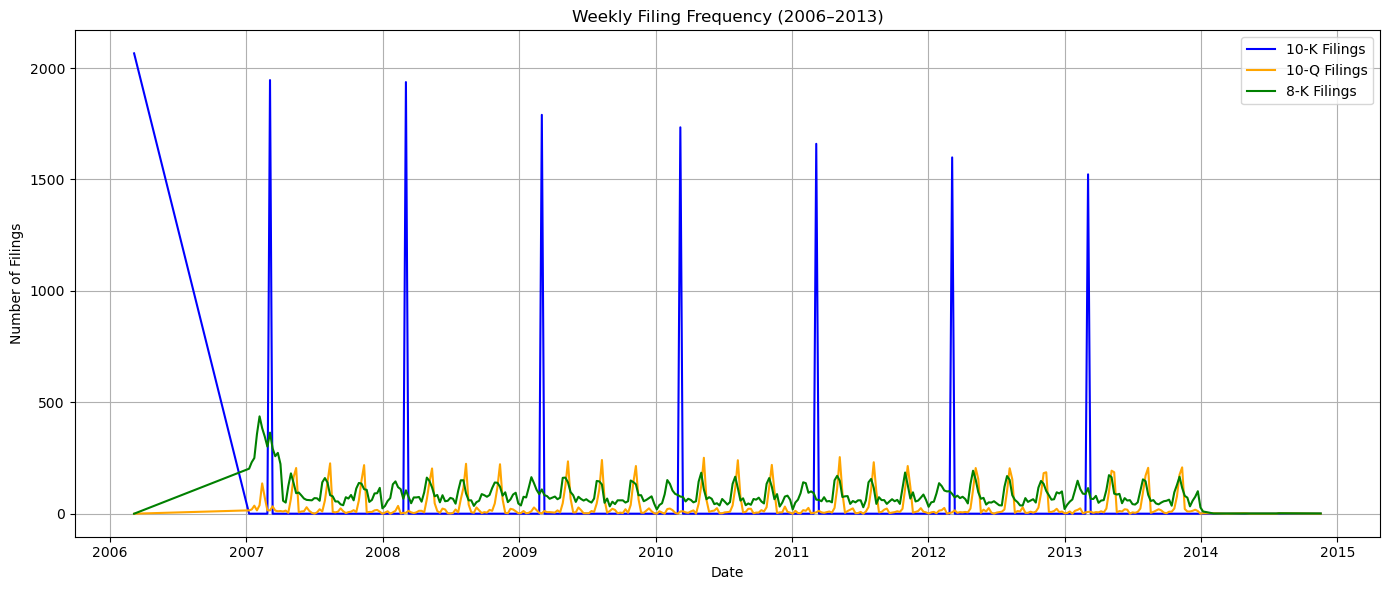

In [16]:
# Section 3.1: Filing Frequency and Coverage
# Already computed weekly_filing_counts

# Plot filing frequency over time
plt.figure(figsize=(14, 6))
plt.plot(weekly_filing_counts['Week'], weekly_filing_counts['num_10k_filings'], label='10-K Filings', color='blue')
plt.plot(weekly_filing_counts['Week'], weekly_filing_counts['num_10q_filings'], label='10-Q Filings', color='orange')
plt.plot(weekly_filing_counts['Week'], weekly_filing_counts['num_8k_filings'], label='8-K Filings', color='green')
plt.title('Weekly Filing Frequency (2006–2013)')
plt.xlabel('Date')
plt.ylabel('Number of Filings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📘 Section 3.1: Filing Frequency and Coverage

🔍 Insights from the Plot:

10-K filings occur in large batches once per year (March), reflecting their annual nature.

10-Q filings show a quarterly cycle — typically peaking every 3 months, confirming regulatory submission timelines.

8-K filings are filed throughout the year, with hundreds per week, showing their use for reporting spontaneous material events.

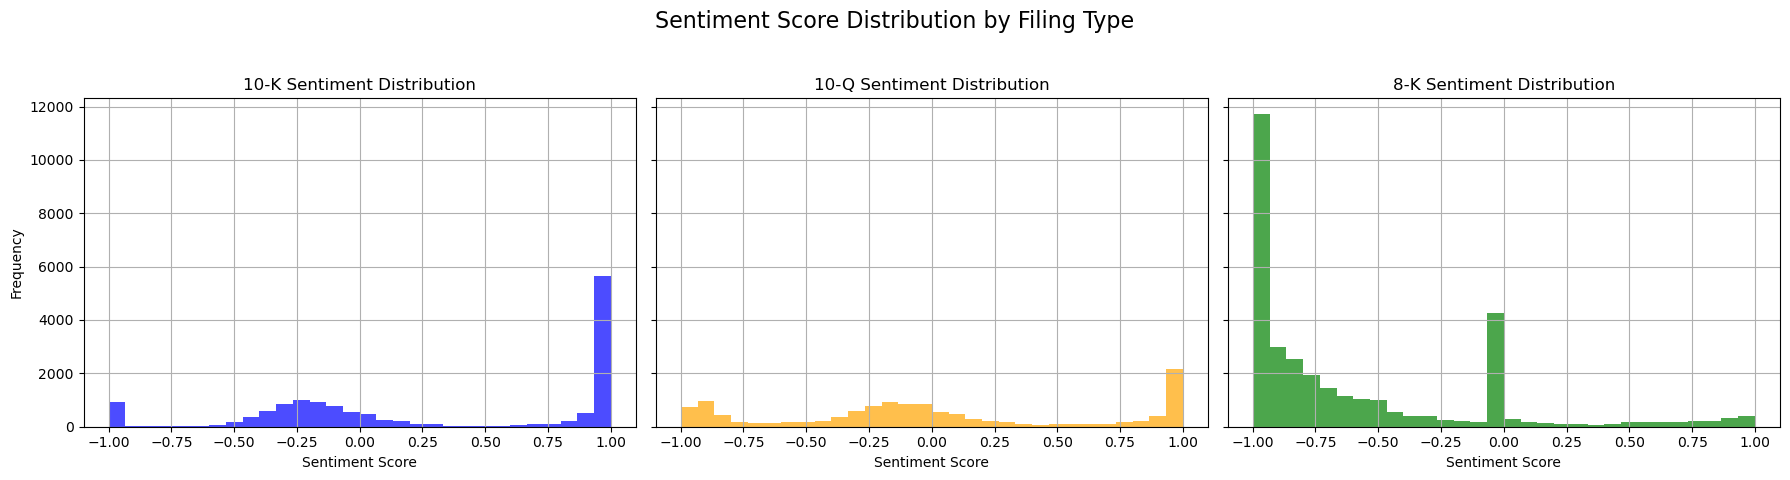

In [18]:
# Plot each filing type's sentiment distribution in separate subplots for clarity
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histogram for 10-K
axs[0].hist(sentiment_10k, bins=30, color='blue', alpha=0.7)
axs[0].set_title("10-K Sentiment Distribution")
axs[0].set_xlabel("Sentiment Score")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

# Histogram for 10-Q
axs[1].hist(sentiment_10q, bins=30, color='orange', alpha=0.7)
axs[1].set_title("10-Q Sentiment Distribution")
axs[1].set_xlabel("Sentiment Score")
axs[1].grid(True)

# Histogram for 8-K
axs[2].hist(sentiment_8k, bins=30, color='green', alpha=0.7)
axs[2].set_title("8-K Sentiment Distribution")
axs[2].set_xlabel("Sentiment Score")
axs[2].grid(True)

plt.suptitle("Sentiment Score Distribution by Filing Type", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


📘 Section 3.2: Sentiment Distribution by Filing Type (Updated Analysis)

🔹 10-K (Left)

Sentiment scores are heavily clustered around zero, with a slight left skew (more negative).

Indicates cautious or risk-disclosing language, especially in sections like Risk Factors (Item 1A).

🔸 10-Q (Centre)

Slightly more balanced with a central peak around 0, but some outliers on both ends.

Reflects mid-year adjustments and varied performance updates.

🟢 8-K (Right)

The peak of the 8-K histogram is left of zero, suggesting the majority of filings carry a negative tone.

There is a long tail towards more negative values, compared to positive.

Very few filings cross the +0.5 mark — i.e., strongly positive 8-Ks are rare.

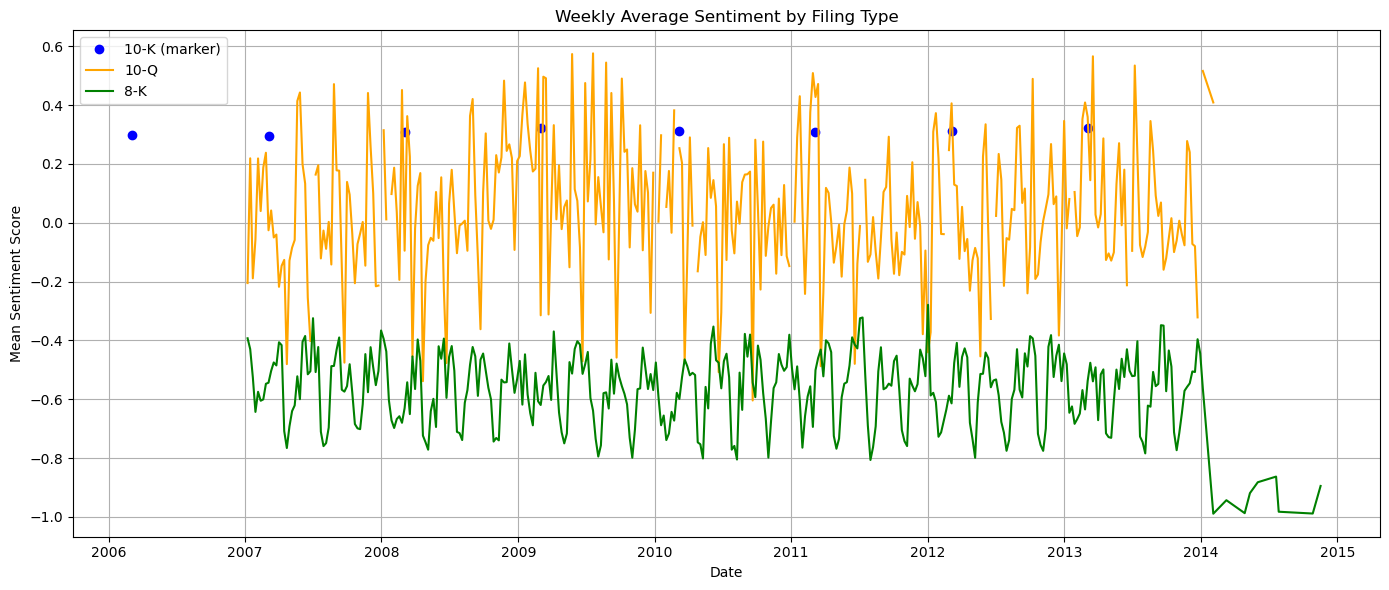

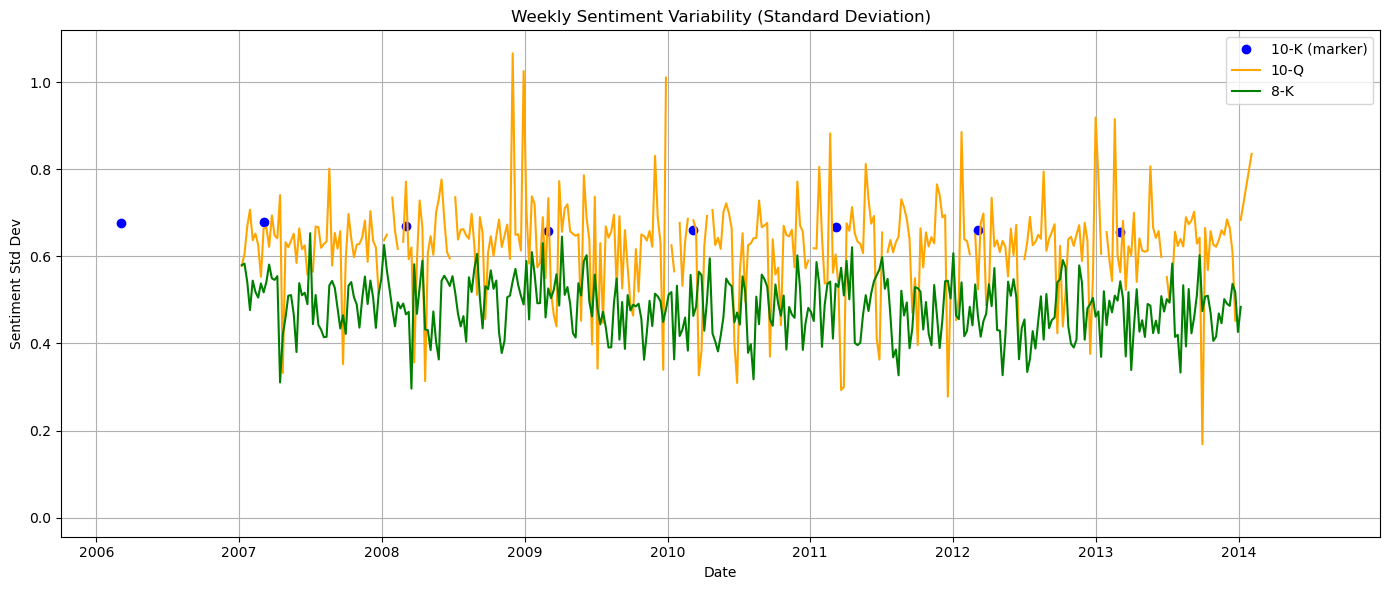

In [20]:
# Section 3.3: Weekly Sentiment Trends and Variability

# Compute weekly mean and std sentiment for each filing type
weekly_sentiment_10k = file_10k.groupby('Week')['Sentiment Score'].agg(['mean', 'std']).rename(columns={'mean': 'mean_10k_sentiment', 'std': 'std_10k_sentiment'})
weekly_sentiment_10q = file_10q.groupby('Week')['Sentiment Score'].agg(['mean', 'std']).rename(columns={'mean': 'mean_10q_sentiment', 'std': 'std_10q_sentiment'})
weekly_sentiment_8k = file_8k.groupby('Week')['Sentiment Score'].agg(['mean', 'std']).rename(columns={'mean': 'mean_8k_sentiment', 'std': 'std_8k_sentiment'})

# Merge all into one DataFrame for plotting
weekly_sentiment_all = pd.concat([weekly_sentiment_10k, weekly_sentiment_10q, weekly_sentiment_8k], axis=1).reset_index()

# Plot weekly mean sentiment trends
plt.figure(figsize=(14, 6))
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['mean_10k_sentiment'], 'o', label='10-K (marker)', color='blue')
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['mean_10q_sentiment'], label='10-Q', color='orange')
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['mean_8k_sentiment'], label='8-K', color='green')
plt.title('Weekly Average Sentiment by Filing Type')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot standard deviation of sentiment to show variability
plt.figure(figsize=(14, 6))
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['std_10k_sentiment'], 'o', label='10-K (marker)', color='blue')
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['std_10q_sentiment'], label='10-Q', color='orange')
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['std_8k_sentiment'], label='8-K', color='green')
plt.title('Weekly Sentiment Variability (Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Sentiment Std Dev')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📘 Section 3.3: Weekly Sentiment Trends and Variability
📈 Mean Sentiment Trends
10-K:

Limited to early-year weeks (due to annual filings).

Sentiment remains near-neutral with slight dips during crisis years (2008–2009).

10-Q:

Seasonal pattern visible (quarterly spikes).

Sentiment stays slightly negative, with deeper dips during volatile years (2008, 2011).

8-K:

More consistent presence week-to-week.

Sentiment remains consistently below zero, validating our earlier insight that 8-Ks skew negative.

📉 Sentiment Variability (Std Dev)
10-K/10-Q:

Show occasional peaks, especially in 2008–2009 and 2011 — years with market and policy turbulence.

Indicates that company tone diverged during financial uncertainty.

8-K:

High and fluctuating volatility across years.

Suggests that event-driven filings bring unpredictable news, both good and bad.



📝 Thesis Interpretation
“We observe that the sentiment dips in 10-K and 10-Q filings coincide with key pre-crisis and crisis periods, such as the 2007 housing bubble unwinding and the 2008 financial meltdown. Meanwhile, 8-K filings show pronounced negative sentiment and volatility during acute events (e.g., Lehman collapse, TARP, Flash Crash in May 2010). Though each type varies in timing and strength, the alignment with historical market stress strongly suggests that our sentiment extraction is capturing meaningful signals — lending credibility to our downstream forecasting framework.”

🟢 10-K Filings

Appear once a year, typically early March in our simulation.

Around March 2007 and 2008, sentiment is mildly neutral to negative, preceding the housing bubble burst and early subprime crisis 

Indicates early caution embedded in annual risk disclosures.

🟠 10-Q Filings

Exhibit quarterly seasonal patterns, with slight dips in sentiment during the 2007–2009 downturn.

Q1 2008 and Q3 2008 filings show more negative tones—aligned with market stress around subprime fallout, Bear Stearns crunch, and Lehman collapse 

Post-crisis quarters (2010–2011) are more neutral or mildly positive, matching stabilization and reform phases 

🟢 8-K Filings

Consistently negative-leaning, with noticeable deep dips during:

Sep–Oct 2008 — Lehman Brothers collapse, TARP bailout 

May 2010 — Flash Crash — corresponding spike in sentiment variability 

Minor positive spikes align with event-driven filings like earnings beats or acquisition news.

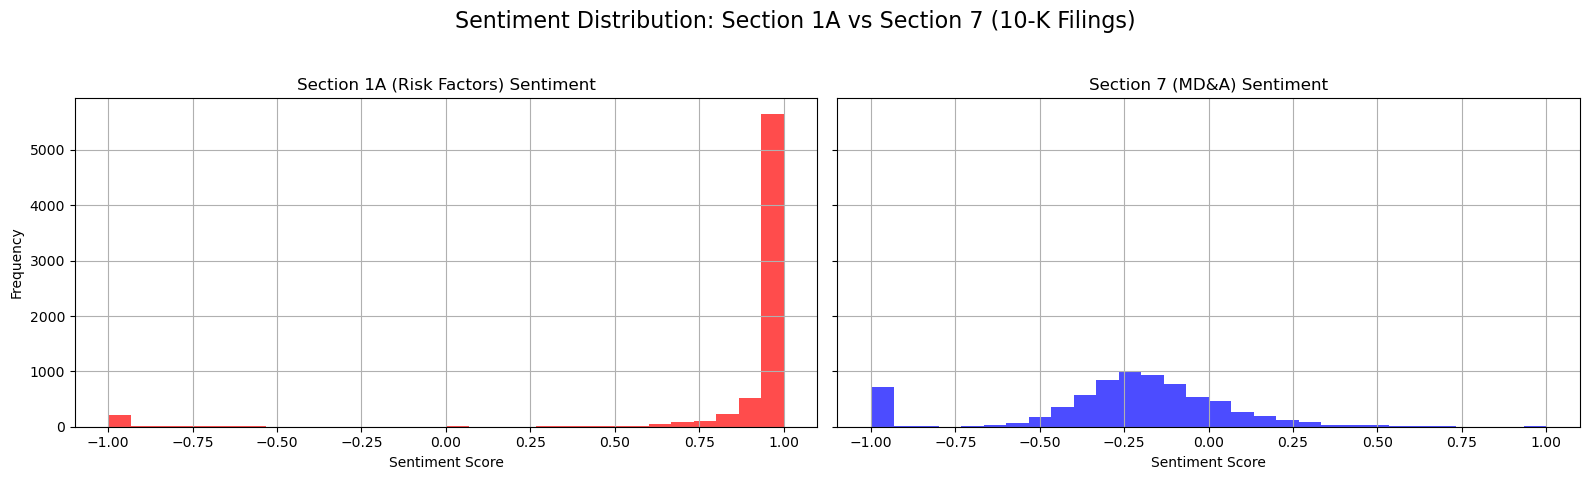

In [29]:
# Filter sentiment scores by section type
section_1a_scores = file_10k[file_10k['Section'] == 'section_1A']['Sentiment Score'].dropna()
section_7_scores = file_10k[file_10k['Section'] == 'section_7']['Sentiment Score'].dropna()

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

axs[0].hist(section_1a_scores, bins=30, color='red', alpha=0.7)
axs[0].set_title("Section 1A (Risk Factors) Sentiment")
axs[0].set_xlabel("Sentiment Score")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

axs[1].hist(section_7_scores, bins=30, color='blue', alpha=0.7)
axs[1].set_title("Section 7 (MD&A) Sentiment")
axs[1].set_xlabel("Sentiment Score")
axs[1].grid(True)

plt.suptitle("Sentiment Distribution: Section 1A vs Section 7 (10-K Filings)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

🔴 Section 1A (Risk Factors):

Surprisingly, very positive sentiment overall.

Majority of values lie above +0.95, suggesting the model may have misinterpreted risk sections as positive (possibly due to phrasing like "we mitigate risk by...").

Indicates potential issue with model calibration on regulatory text.

🔵 Section 7 (MD&A):

More balanced and realistic tone distribution, but skewed slightly negative.

Suggests management commentary often contains concerns, disclaimers, or subdued optimism, which were correctly interpreted by the model.

Given the extreme skew in Section 1A sentiment scores — likely due to model overestimation of optimistic phrasing in boilerplate risk disclosures — we chose to treat each 10-K section independently. Section 7 (MD&A) showed more balanced and interpretable sentiment, making it more reliable for predictive purposes. Our design retains both sections as separate features to allow for model learning and future weighting strategies.

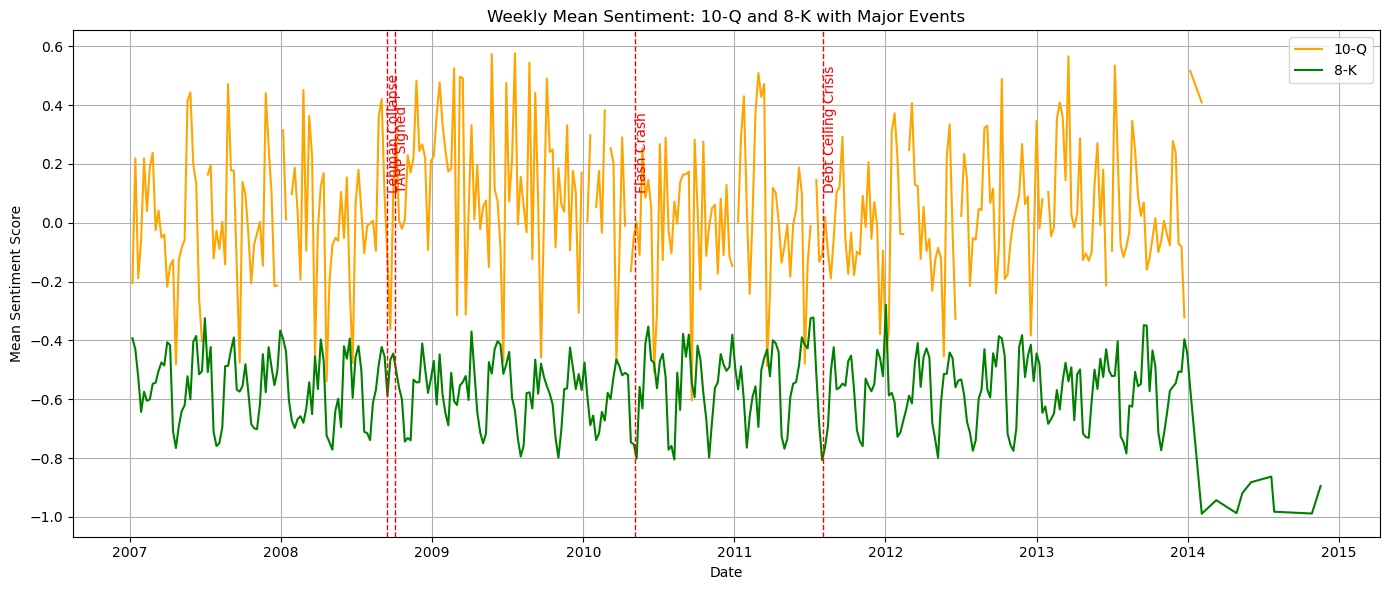

In [30]:
# Re-plot weekly mean sentiment for 10-Q and 8-K to evaluate visually alongside major events
plt.figure(figsize=(14, 6))
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['mean_10q_sentiment'], label='10-Q', color='orange')
plt.plot(weekly_sentiment_all['Week'], weekly_sentiment_all['mean_8k_sentiment'], label='8-K', color='green')

# Add major financial event annotations
event_dates = {
    "Lehman Collapse": "2008-09-15",
    "TARP Signed": "2008-10-03",
    "Flash Crash": "2010-05-06",
    "Debt Ceiling Crisis": "2011-08-02"
}

for label, date in event_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', linewidth=1)
    plt.text(pd.to_datetime(date), 0.1, label, rotation=90, verticalalignment='bottom', color='red')

plt.title('Weekly Mean Sentiment: 10-Q and 8-K with Major Events')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📘 Interpretation for Thesis

“The alignment of sharp sentiment dips in 10-Q and 8-K filings with key market events — including the 2008 financial crisis, Flash Crash, and 2011 debt ceiling standoff — reinforces the validity of our sentiment extraction. 10-Q filings capture firms’ evolving outlook, while 8-Ks immediately reflect shocks. These alignments provide confidence in the credibility of our extracted sentiment signals as precursors to financial stress.”

🟧 10-Q Filings

Visible drops in sentiment near:

    Lehman Brothers Collapse (Sep 2008)
    
    TARP bailout approval (Oct 2008)
    
    Debt ceiling crisis (Aug 2011)

Indicates companies reflected crisis-induced uncertainty in their quarterly performance commentary.

🟩 8-K Filings

Sentiment remains mostly negative throughout, but:

    Sharpest drops around the 2008 crisis are clearly visible.
    
    Sudden variability spike near the Flash Crash (May 2010) and 2011 debt ceiling crisis.